## Regression using Decision Trees

In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#import xgboost

In [2]:
# generate some training data
x_train=np.linspace(-1,1,101)
num_coeff = 8
learning_rate = 0.01
training_epochs = 100
y_train_coeff = np.array([1, 3, 2, 6, 9, 8, 4, 5])

y_kernel = []
for i in range(num_coeff):
    term = np.power(x_train,i)
    y_kernel.append(term)
y_train = np.dot(y_train_coeff, y_kernel) + np.random.randn(*x_train.shape)*2    


In [3]:
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(x_train.reshape(-1,1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

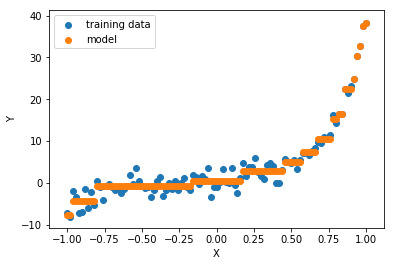

In [4]:
y_pred = tree_reg.predict(x_train.reshape(-1,1))
plt.scatter(x_train,y_train,label="training data")
plt.scatter(x_train,y_pred,label="model")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [5]:
export_graphviz(tree_reg, out_file="./poly_tree.dot", rounded=True, filled=True)

## Gradient Boosting Regression Tree

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=6, learning_rate=0.5)
gbrt.fit(x_train.reshape(-1,1), y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.5, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=6, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

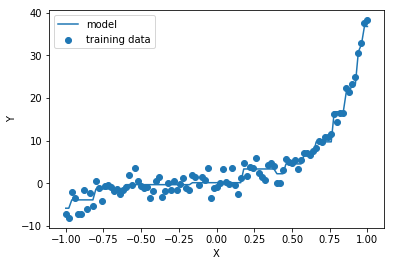

In [7]:
y_pred = gbrt.predict(x_train.reshape(-1,1))
plt.scatter(x_train,y_train,label="training data")
plt.plot(x_train,y_pred,label="model")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

With early stopping:

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(x_train.reshape(-1,1), y_train)
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(x_val.reshape(-1,1))]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(x_train.reshape(-1,1), y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=77, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

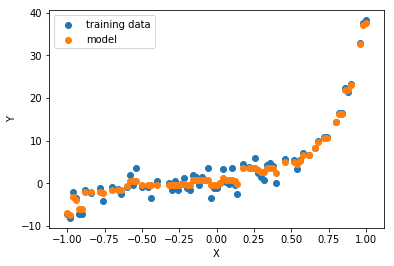

In [9]:
y_pred = gbrt_best.predict(x_train.reshape(-1,1))
plt.scatter(x_train,y_train,label="training data")
plt.scatter(x_train,y_pred,label="model")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

A more effiecinet early stopping:

In [10]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train.reshape(-1,1), y_train)
    y_pred = gbrt.predict(x_val.reshape(-1,1))
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping

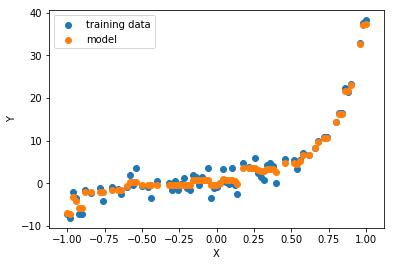

In [11]:
y_pred = gbrt.predict(x_train.reshape(-1,1))
plt.scatter(x_train,y_train,label="training data")
plt.scatter(x_train,y_pred,label="model")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## XGBoost

Optimised Gradient Boosting (Automatically implements early stopping)

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train.reshape(-1,1), y_train)
y_pred = xgb_reg.predict(x_val.reshape(-1,1))
xgb_reg.fit(z_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)